In [328]:
import SimpleITK as sitk
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.io as io
from mpl_toolkits.mplot3d import Axes3D
import pywt

In [329]:
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.measure import compare_psnr


In [330]:
def fft2c(x):
    fctr = x.shape[0]*x.shape[1]
    res = (1/np.sqrt(fctr))*(np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(x))))
       
    return res


def ifft2c(x):
    fctr = x.shape[0]*x.shape[1]

    res = (np.sqrt(fctr))*(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(x))))
    
    return res

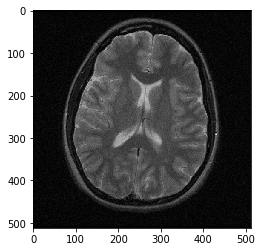

In [215]:


mat = sci.io.loadmat('matlab_workspace.mat')
sci.io.whosmat('matlab_workspace.mat')

im_brain_ori= mat['im']
freq_mask= mat['mask_vardens']
brain_pdf= mat['pdf_vardens']


plt.imshow(abs(im_brain_ori),cmap='gray')


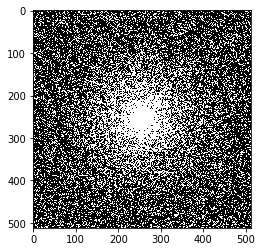

In [122]:
plt.imshow(abs(brain_mask),cmap='gray')

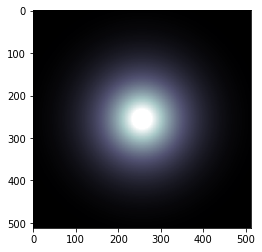

In [153]:
plt.imshow(abs(brain_pdf),cmap='bone')


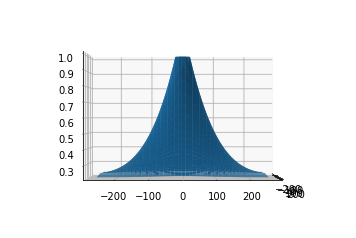

In [317]:
#OPTIONAL

x_size = brain_pdf.shape[0]
y_size = brain_pdf.shape[1]
X = np.linspace(-255, 255, x_size)
Y = np.linspace(-255, 255, y_size)


hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(X, Y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y,brain_pdf)
ha.view_init(0, 0)

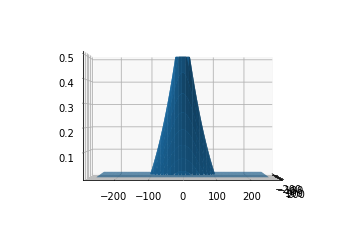

In [318]:
#################SUBSTRACT PDF HEIGHT##########################
#plt.imshow(flatten_pdf_1,cmap='bone')

N_subst = 0.5 #max 1.0

flatten_pdf_1 = (brain_pdf-N_subst).clip(min=0.0000000005)

x_size = brain_pdf.shape[0]
y_size = brain_pdf.shape[1]
X = np.linspace(-255, 255, x_size)
Y = np.linspace(-255, 255, y_size)


hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(X, Y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y,flatten_pdf_1)
ha.view_init(0, 0)



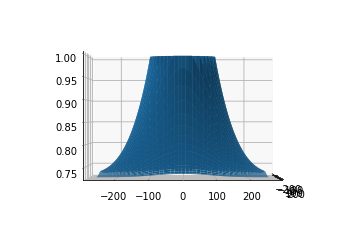

In [327]:
#################INCREASE PDF HEIGHT##########################

max_pdf_cell = np.amax(brain_pdf)

N_add = 0.5
flatten_pdf_2 = (brain_pdf+N_add).clip(max=max_pdf_cell)

x_size = brain_pdf.shape[0]

y_size = brain_pdf.shape[1]
X = np.linspace(-255, 255, x_size)
Y = np.linspace(-255, 255, y_size)

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(X, Y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y,flatten_pdf_2)
ha.view_init(0, 0)


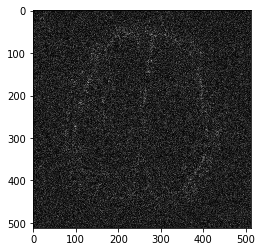

In [321]:
####FIRST STAGE RECONSTRUCTION###########


pdf_set = flatten_pdf_1 #brain_pdf is the default, or flatten_pdf_2 or flatten_pdf_1 for other setting

fft_1=fft2c(im_brain_ori)

data_1 = np.multiply(fft_1,freq_mask)

data_1_weighted = np.divide(data_1,pdf_set)

ifft_1=ifft2c(data_1_weighted)

plt.imshow(abs(ifft_1),cmap = 'gray')

1
iterations


Reconstructed Image :


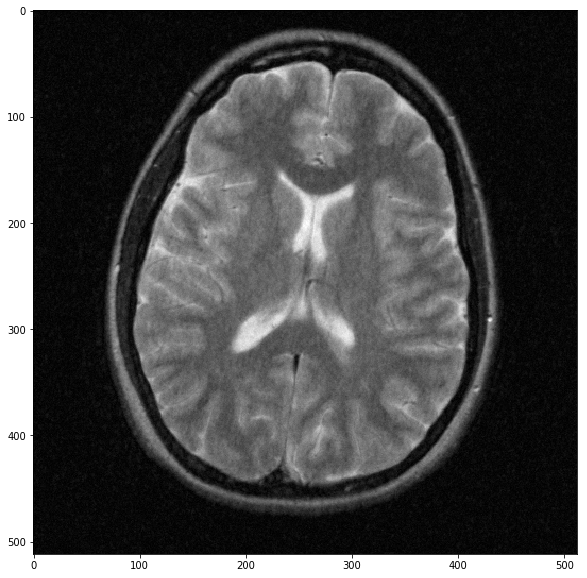

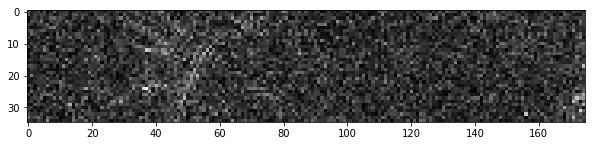

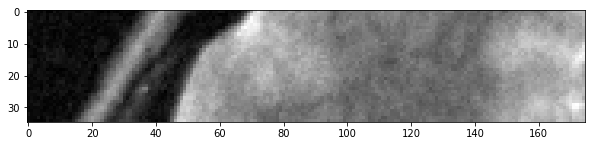

In [326]:
####SECONDS STAGE RECONSTRUCTION###########
####USING ALTERNATIVE ALGORITHM###########


rct_1  = ifft_1

sigma_denoise = 1.5
denoise_iter = 1
denoise_iter_fix = denoise_iter
while denoise_iter > 0:
    denoise_iter = denoise_iter-1

   
    rct_denoise = denoise_wavelet(abs(rct_1), mode='soft', sigma = sigma_denoise)
    
    rct_preprocess_1 = fft2c(rct_denoise)
    rct_preprocess_2 = (np.multiply(rct_preprocess_1,(1-freq_mask))) + data_1
    rct_postprocess =  ifft2c(rct_preprocess_2)
    rct_1 = rct_postprocess

print(denoise_iter_fix - denoise_iter)
print('iterations')
print('\n')
print('Reconstructed Image :')
fig = plt.figure(figsize=(10, 10))
plt.imshow(abs(rct_postprocess),cmap = 'gray')
plt.show()

crop_1 = ifft_1[90:125,100:275]

fig = plt.figure(figsize=(10, 10))
plt.imshow(abs(crop_1),cmap = 'gray')
plt.show()


crop_2 = rct_1[90:125,100:275]

fig = plt.figure(figsize=(10, 10))
plt.imshow(abs(crop_2),cmap = 'gray')
plt.show()

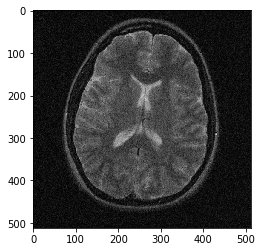

In [241]:
mat_denoise = sci.io.loadmat('first_denoise.mat')
sci.io.whosmat('first_denoise.mat')

im_denoise_mat= mat_denoise['im_us']

plt.imshow(abs(im_denoise_mat),cmap = 'gray')
plt.show()

In [ ]:
####SECOND STAGE RECONSTRUCTION###########

####USING ORIGINAL ALGORITHM###########
rct_1  = ifft_1
lambda_thresh= 0.025
denoise_iter = 3
while denoise_iter > 0:
    print(denoise_iter)
    denoise_iter = denoise_iter-1
    
    rct_w = wave_op*rct_1
    rct_thresh_1 = (abs(rct_w)>lambda_thresh)
    rct_thresh_2 = np.divide(np.multiply(rct_w,(abs(rct_w)-lambda_thresh),abs(rct_w))
    rct_threshd_final =np.multiply(rct_thresh_1, rct_thresh_2) #softthtreshold
    
    
    rct_preprocess_1 = np.fft.fft2c(rct_threshd_final)
    rct_preprocess_2 = (np.multiply(rct_preprocess_1,(1-freq_mask))) + data_1
    rct_postprocess =  np.fft.ifft2(rct_preprocess_2)
    rct_1 = rct_postprocess
    
    print('Reconstructed Image')
    
    plt.imshow(abs(rct_1))
    plt.show()

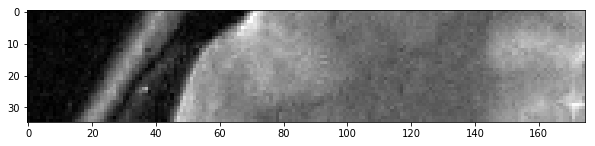

In [333]:
pic = sci.io.loadmat('picture_mat.mat')


im_mat= pic['im_cs']

im_crop = im_mat[90:125,100:275]



fig = plt.figure(figsize=(10, 10))
plt.imshow(abs(im_crop),cmap = 'gray')
plt.show()